In [196]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas.io.data as web

%matplotlib inline

In [201]:
# step 1: Range Selection
st = dt.datetime(2007,12,1)
en = dt.datetime(2016,1,1)
sp500_tickers_lil = ['AA','AAPL','ABC','ABT','ADBE','ADI','ADM','ADP','ADSK','AEE']
sp500_tickers_joey = ['AA','AAPL','ABC','ABT','ADBE','ADI','ADM','ADP','ADSK','AEE','AEP','AES','AET','AFL','AGN','AIG','AIV','AIZ','AKAM','ALL','AMAT','AMGN','AMP','AMT','AMZN','AN','ANTM','AON','APA','APC','APD','AVB','AVY','AXP','AZO','BA','BAC','BAX','BBBY','BBT','BBY','BCR','BDX','BEN','BFB','BHI','BIIB','BK','BLL','BMY','BRCM','BSX','BXP','C','CA','CAG','CAH','CAT','CB','CBG','CBS','CCE','CCL','CELG','CHK','CHRW','CI','CINF','CL','CLX','CMA','CMCSA','CME','CMI','CMS','CNP','CNX','COF','COH','COL','COP','COST','CPB','CSCO','CSX','CTAS','CTL','CTSH','CTXS','CVS','CVX','D','DD','DE','DFS','DGX','DHI','DHR','DIS','DOV','DOW','DRI','DTE','DUK','DVN','EA','EBAY','ECL','ED','EFX','EIX','EL','EMC','EMN','EMR','EOG','EQR','ESRX','ETFC','ETN','ETR','EXC','EXPD','EXPE','F','FCX','FDX','FE','FIS','FISV','FITB','FLR','FOXA','FTR','GAS','GD','GE','GILD','GIS','GLW','GME','GOOGL','GPC','GPS','GS','GT','GWW','HAL','HAR','HAS','HBAN','HD','HES','HIG','HOG','HON','HOT','HPQ','HRB','HST','HSY','HUM','IBM','ICE','IFF','INTC','INTU','IP','IPG','ITW','JCI','JEC','JNJ','JNPR','JPM','JWN','K','KEY','KIM','KLAC','KMB','KO','KR','KSS','L','LB','LEG','LEN','LH','LLL','LLTC','LLY','LM','LMT','LNC','LOW','LUK','LUV','M','MAR','MAS','MAT','MCD','MCHP','MCK','MCO','MDLZ','MDT','MET','MHFI','MKC','MMC','MMM','MO','MON','MRK','MRO','MS','MSFT','MSI','MTB','MU','MUR','MYL','NBL','NEE','NEM','NI','NKE','NOC','NOV','NSC','NTAP','NTRS','NUE','NVDA','NWL','OMC','ORCL','OXY','PAYX','PBI','PCAR','PCG','PCL','PCP','PDCO','PEG','PEP','PFE','PFG','PG','PGR','PH','PHM','PKI','PLD','PNC','PNW','POM','PPG','PPL','PRU','PSA','PX','QCOM','R','RAI','RF','RHI','RL','ROK','RRC','RTN','SBUX','SCHW','SE','SEE','SHW','SLB','SNA','SNDK','SO','SPG','SPLS','SRE','STI','STJ','STT','STZ','SWK','SYK','SYMC','SYY','T','TAP','TDC','TE','TGT','THC','TIF','TJX','TMK','TMO','TROW','TRV','TSN','TSO','TSS','TWX','TXN','TXT','UNH','UNM','UNP','UPS','USB','UTX','VAR','VFC','VIAB','VLO','VMC','VNO','VRSN','VZ','WAT','WBA','WFC','WFM','WHR','WM','WMB','WMT','WU','WY','WYN','XEL','XL','XLNX','XOM','XRX','YHOO','YUM','ZBH','ZION']

#options
jan = True

In [207]:
regr_coefs = []
k = 0

for ticker in sp500_tickers_lil:
    try:
        data = web.get_data_yahoo(ticker, start=st, end=en)
        k += 1
    except:
        print(ticker, "error")
        continue
        
    
    mdata = data.resample("M").pct_change().dropna()
    Y = mdata["Close"].values - np.mean(mdata["Close"].values)
    close = mdata["Close"].values
    if jan:
        X = np.zeros([len(close),16]) # 1 constant + 12*mo + 1 2y + 1 3y + January
        X[0::12,-1] = 1
    else:
        X = np.zeros([len(close),15]) # 1 constant + 12*mo + 1 2y + 1 3y
    
    # constant
    #X[:,0] = 1    

    # monthly lags
    for x in range(12):
        pass
        #X[:,1+x] = np.roll(mdata["Close"].values,1+x)
        
    # 24m lags
    #X[:,13] = np.roll(mdata["Close"].values,24)
    
    # 36m lags
    #X[:,14] = np.roll(mdata["Close"].values,36)
    
    # truncate
    #X = X[36:,:]
    #Y = Y[36:]
    
    print("Ticker", ticker, "Regr. Start Date", mdata["Close"].index[36],"ndata",len(Y))
        
    result = sm.OLS(Y,X).fit()
    #print(result.summary())
    regr_coefs.append(result.params)
    
#print("done")
avg_coefs = np.mean(np.array(regr_coefs),axis=0)
labels = ["const","1m","2m","3m","4m","5m","6m","7m","8m","9m","10m","11m","12m","24m","36m","Jan"]
for x in zip(labels, avg_coefs):
    print(x)

Ticker AA Regr. Start Date 2011-01-31 00:00:00 ndata 96
Ticker AAPL Regr. Start Date 2011-01-31 00:00:00 ndata 96
Ticker ABC Regr. Start Date 2011-01-31 00:00:00 ndata 96
Ticker ABT Regr. Start Date 2011-01-31 00:00:00 ndata 96
Ticker ADBE Regr. Start Date 2011-01-31 00:00:00 ndata 96
Ticker ADI Regr. Start Date 2011-01-31 00:00:00 ndata 96
Ticker ADM Regr. Start Date 2011-01-31 00:00:00 ndata 96
Ticker ADP Regr. Start Date 2011-01-31 00:00:00 ndata 96
Ticker ADSK Regr. Start Date 2011-01-31 00:00:00 ndata 96
Ticker AEE Regr. Start Date 2011-01-31 00:00:00 ndata 96
('const', 0.0)
('1m', 0.0)
('2m', 0.0)
('3m', 0.0)
('4m', 0.0)
('5m', 0.0)
('6m', 0.0)
('7m', 0.0)
('8m', 0.0)
('9m', 0.0)
('10m', 0.0)
('11m', 0.0)
('12m', 0.0)
('24m', 0.0)
('36m', 0.0)
('Jan', 0.00051754458428786656)


In [175]:
mdata

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2001-01-31,-0.075147,-0.071475,-0.086834,-0.084010,0.010082,-0.081401
2001-02-28,0.003664,0.002997,0.014708,0.010495,-0.154744,0.010495
2001-03-31,-0.024178,-0.027955,-0.026263,-0.027624,0.423454,-0.014937
2001-04-30,0.036546,0.039563,0.038377,0.040184,-0.280539,0.042425
2001-05-31,0.015382,0.013097,0.022107,0.018120,0.010954,0.018120
2001-06-30,0.009886,0.008626,0.005095,0.005805,0.151720,0.018437
2001-07-31,-0.049515,-0.050585,-0.051877,-0.051015,0.129868,-0.048988
2001-08-31,-0.011716,-0.008808,-0.006636,-0.007773,-0.455881,-0.007773
2001-09-30,-0.015537,-0.015105,-0.020411,-0.018252,2.214007,-0.006176


In [161]:
pd.DataFrame(X,Y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0.059849,1,0.098059,-0.037201,0.043218,0.024256,-0.072971,-0.064861,-0.106728,-0.009962,0.249862,0.141339,0.085143,0.290954,-0.273723,-0.101487,1
0.005379,1,0.061141,0.098059,-0.037201,0.043218,0.024256,-0.072971,-0.064861,-0.106728,-0.009962,0.249862,0.141339,0.085143,-0.383106,0.135610,0
-0.058031,1,0.006671,0.061141,0.098059,-0.037201,0.043218,0.024256,-0.072971,-0.064861,-0.106728,-0.009962,0.249862,0.141339,-0.180904,-0.080184,0
0.044549,1,-0.056739,0.006671,0.061141,0.098059,-0.037201,0.043218,0.024256,-0.072971,-0.064861,-0.106728,-0.009962,0.249862,0.239407,-0.041055,0
-0.013513,1,0.045841,-0.056739,0.006671,0.061141,0.098059,-0.037201,0.043218,0.024256,-0.072971,-0.064861,-0.106728,-0.009962,0.291006,-0.007567,0
-0.040815,1,-0.012221,0.045841,-0.056739,0.006671,0.061141,0.098059,-0.037201,0.043218,0.024256,-0.072971,-0.064861,-0.106728,-0.101762,-0.212684,0
0.024599,1,-0.039523,-0.012221,0.045841,-0.056739,0.006671,0.061141,0.098059,-0.037201,0.043218,0.024256,-0.072971,-0.064861,-0.124810,-0.245266,0
-0.255477,1,0.025891,-0.039523,-0.012221,0.045841,-0.056739,0.006671,0.061141,0.098059,-0.037201,0.043218,0.024256,-0.072971,0.422210,0.051363,0
-0.081050,1,-0.254185,0.025891,-0.039523,-0.012221,0.045841,-0.056739,0.006671,0.061141,0.098059,-0.037201,0.043218,0.024256,0.040167,0.341012,0
0.029485,1,-0.079758,-0.254185,0.025891,-0.039523,-0.012221,0.045841,-0.056739,0.006671,0.061141,0.098059,-0.037201,0.043218,-0.032342,-0.040729,0


In [150]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     3.418
Date:                Wed, 13 Apr 2016   Prob (F-statistic):           0.000249
Time:                        20:55:38   Log-Likelihood:                 108.63
No. Observations:                  85   AIC:                            -185.3
Df Residuals:                      69   BIC:                            -146.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0026      0.009      0.295      0.7

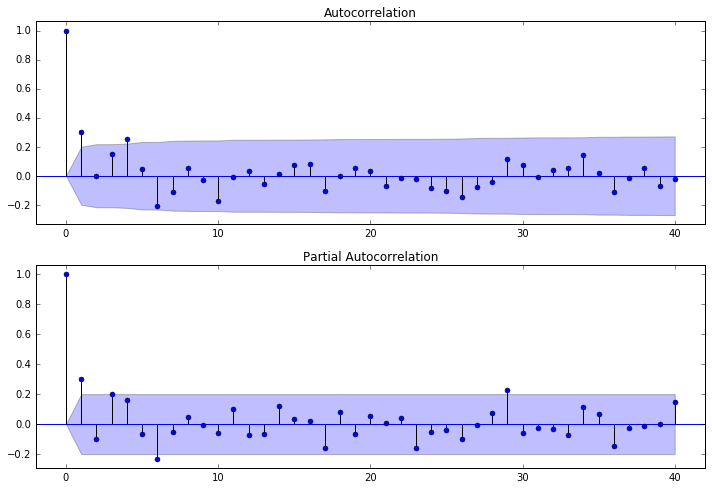

In [208]:
data = web.get_data_yahoo("SPY", start=st, end=en)
mdata = data.resample("M").pct_change().dropna()
Y = mdata["Close"].values - np.mean(mdata["Close"].values)

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Y, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Y, lags=40, ax=ax2)
plt.show()